# Canada Refugee Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i], y[i], ha = "center")

In [3]:
df = pd.read_csv("can-stats-2012-22.csv")

## Understanding the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


### The infomation above shows that 
1. There are **no** missing values in the dataset
2. The total numbers of columns = **5**
3. The total numbers of records =  **1870**
4. There data types are as appropraite


In [5]:
df.duplicated().sum()

0

In [6]:
df["Country-of-origin"].nunique()

184

There are no duplicate records in the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


## Observations

**Year**: The Dataset covers a total of **10 years**, ranging from 2012 to 2023, with an average of 2016

**UNHCR-refugees**: The total number of UNHCR refuges in the data set is **753**

**Asylum-seekers**: The total number of Asylum-seekers in the data set is **323**

In [8]:
df.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [9]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1796\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


## Exploratory Data Analysis

In [10]:
# Q1 From which countries has Canada admitted the highest number of refugees?

highest_numbers_of_refugee_by_country = df["UNHCR-refugees"].groupby(df["Country-of-origin"]).sum().sort_values(ascending = False).reset_index()[0:10]
highest_numbers_of_refugee_by_country


,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


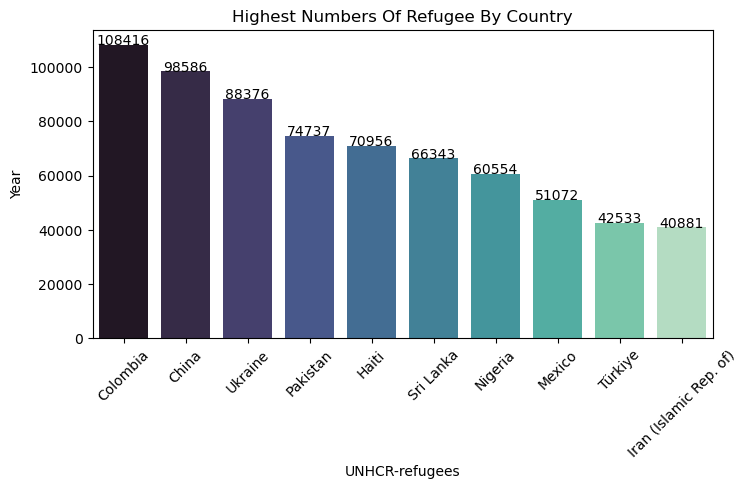

In [11]:
# Q1 Vizual

plt.figure(figsize = (8,4))
sns.barplot(x = "Country-of-origin", y = "UNHCR-refugees", data = highest_numbers_of_refugee_by_country, palette = "mako")
plt.title("Highest Numbers Of Refugee By Country")
plt.xlabel("UNHCR-refugees")
plt.ylabel("Year")
plt.xticks(rotation = 45)

addlabels(highest_numbers_of_refugee_by_country["Country-of-origin"].to_list(),
          highest_numbers_of_refugee_by_country["UNHCR-refugees"].to_list())
plt.show()

In [12]:
# Q2 What are the total number of resettled refugees in Canada per year?

total_number_of_resettled_refugee_by_year = df["UNHCR-refugees"].groupby(df["Year"]).sum().sort_values(ascending = False).reset_index()
total_number_of_resettled_refugee_by_year 



,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


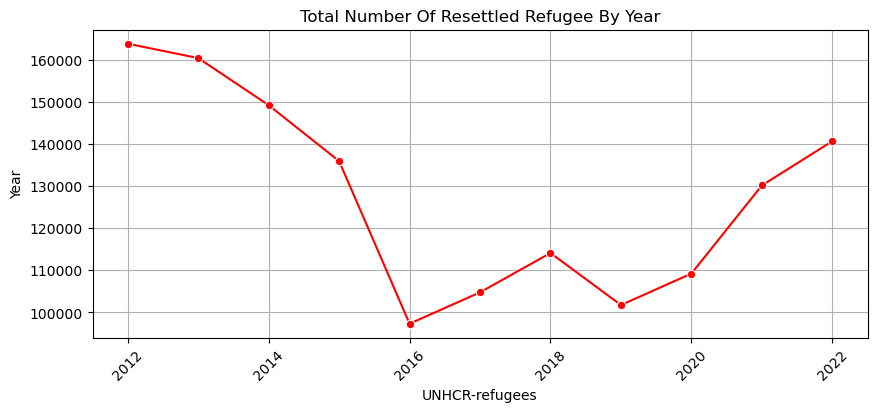

In [13]:
# Q2 Vizual
plt.figure(figsize = (10,4))
sns.lineplot(x = "Year", y = "UNHCR-refugees", data = total_number_of_resettled_refugee_by_year, marker = "o", color = "red")
plt.title("Total Number Of Resettled Refugee By Year")
plt.xlabel("UNHCR-refugees")
plt.ylabel("Year")
plt.xticks(rotation = 45)
plt.grid(visible = True)


plt.show()

In [14]:
# Q3 What are the countries of origin for the majority of asylum claims made in Canada?
top_5_asylum_claims_by_country = df["Asylum-seekers"].groupby(df["Country-of-origin"]).sum().sort_values(ascending = False)[0:5]
top_5_asylum_claims_by_country



Country-of-origin
Unknown    56098
Nigeria    51620
India      48806
Mexico     47146
Haiti      40908
Name: Asylum-seekers, dtype: int64

In [15]:
percentage_top_5_asylum_claims_by_country = top_5_asylum_claims_by_country/top_5_asylum_claims_by_country.sum()*100
percentage_top_5_asylum_claims_by_country

Country-of-origin
Unknown    22.936650
Nigeria    21.105741
India      19.955188
Mexico     19.276468
Haiti      16.725952
Name: Asylum-seekers, dtype: float64

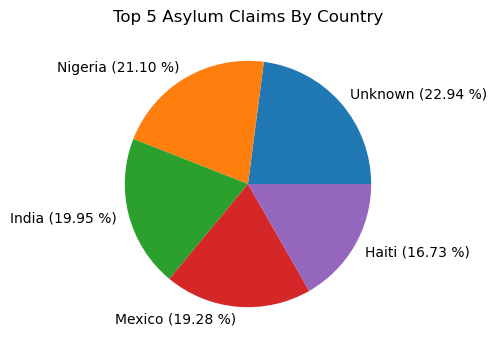

In [16]:
# Q3 Vizual

keys = ['Unknown (22.94 %)','Nigeria (21.10 %)','India (19.95 %)','Mexico (19.28 %)','Haiti (16.73 %)']

plt.figure(figsize = (7,4))
plt.pie(top_5_asylum_claims_by_country, labels = keys)
plt.title("Top 5 Asylum Claims By Country");

In [17]:
# Q4 What is the total number of asylum claims made in Canada every year?

total_number_of_asylum_seekers_by_year = df["Asylum-seekers"].groupby(df["Year"]).sum().sort_values(ascending = False).reset_index()
total_number_of_asylum_seekers_by_year



,Year,Asylum-seekers
0,2022,661.204678
1,2020,569.013333
2,2019,564.052326
3,2018,450.091429
4,2021,369.257310
5,2017,303.269006
6,2012,187.626437
7,2016,140.858824
8,2013,127.270115
9,2015,114.801170


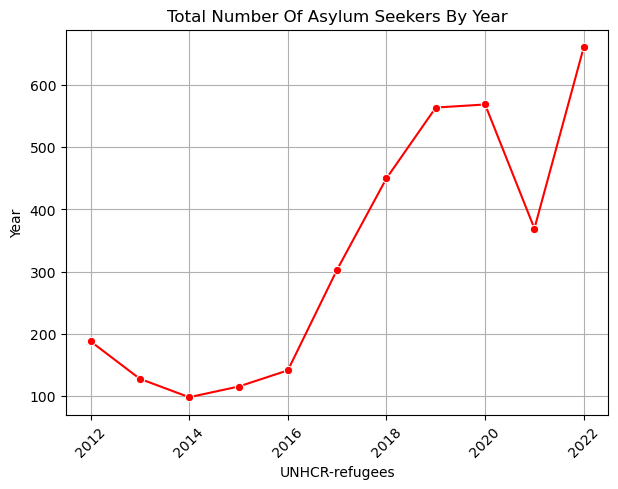

In [18]:
# Q4 Vizual

plt.figure(figsize = (7,5))
sns.lineplot(x = "Year", y = "Asylum-seekers", data = total_number_of_asylum_seekers_by_year, marker = "o", color = "red")
plt.title("Total Number Of Asylum Seekers By Year")
plt.xlabel("UNHCR-refugees")
plt.ylabel("Year")
plt.xticks(rotation = 45)
plt.grid(visible = True)
plt.show()

In [19]:
df["Asylum-seekers"].corr(df["UNHCR-refugees"])

0.27826653631264564

In [20]:
df["Asylum-seekers"].corr(df["Year"])

0.14423851840169538

In [21]:
df["UNHCR-refugees"].corr(df["Year"])

-0.024036684793306565

In [26]:
# Q5 What are the general trends in refugee and asylum statistics from 2012-2022?

top_refugees_by_countries = df["total-count"].groupby(df["Country-of-origin"]).sum().sort_values(ascending = False).reset_index()
top_refugees_by_countries

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
...,...,...
179,Kiribati,15
180,Cabo Verde,10
181,Luxembourg,5
182,Bermuda,5


In [34]:
resettled_and_asylum_yrls = df[["Asylum-seekers","UNHCR-refugees"]].groupby(df["Year"]).sum().sort_values("Year").reset_index()
resettled_and_asylum_yrls

,Year,Asylum-seekers,UNHCR-refugees
0,2012,32647,163751
1,2013,22145,160347
2,2014,16699,149164
3,2015,19631,135890
4,2016,23946,97322
5,2017,51859,104768
6,2018,78766,114101
7,2019,97017,101757
8,2020,85352,109214
9,2021,63143,130125


In [35]:
melted_data = pd.melt(resettled_and_asylum_yrls, id_vars = ["Year"], var_name = "Category", value_name = "Count")
melted_data 

,Year,Category,Count
0,2012,Asylum-seekers,32647
1,2013,Asylum-seekers,22145
2,2014,Asylum-seekers,16699
3,2015,Asylum-seekers,19631
4,2016,Asylum-seekers,23946
5,2017,Asylum-seekers,51859
6,2018,Asylum-seekers,78766
7,2019,Asylum-seekers,97017
8,2020,Asylum-seekers,85352
9,2021,Asylum-seekers,63143


<function matplotlib.pyplot.show(close=None, block=None)>

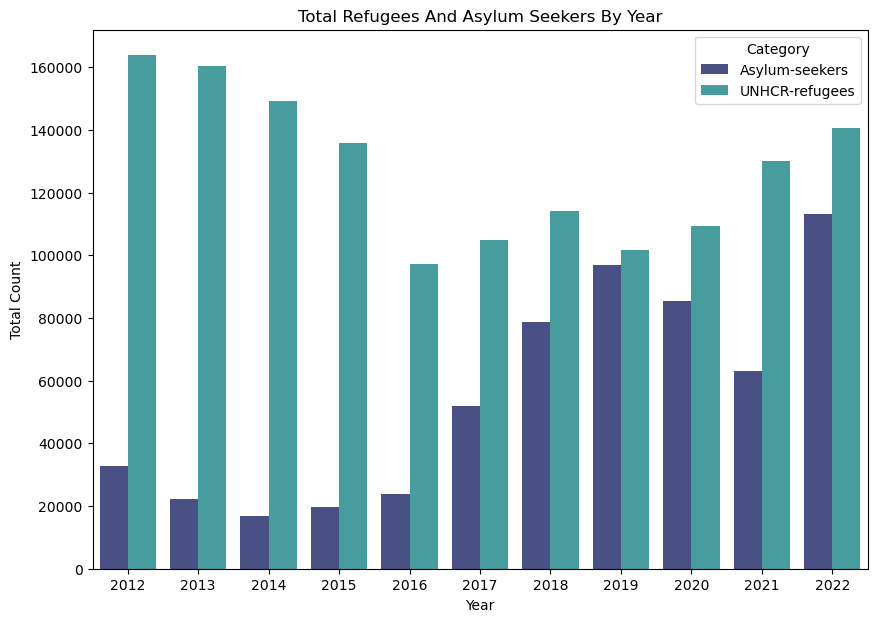

In [36]:
plt.figure(figsize = (10,7))
sns.barplot(x= "Year", y = "Count", hue = "Category", data = melted_data, palette = "mako")
plt.title("Total Refugees And Asylum Seekers By Year")
plt.xlabel("Year")
plt.ylabel("Total Count")

plt.show

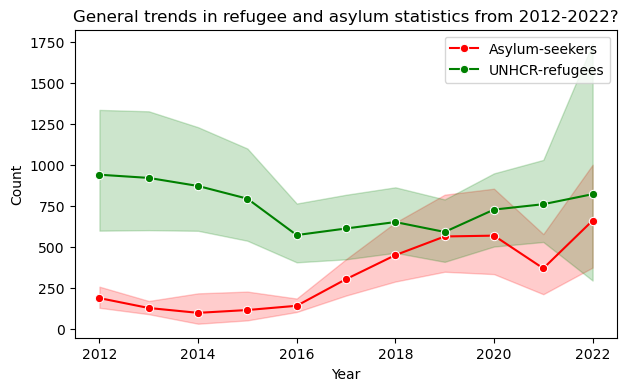

In [25]:
plt.figure(figsize = (7, 4))

sns.lineplot(data=df, x="Year", y="Asylum-seekers", label="Asylum-seekers", marker = "o", color = "red")
sns.lineplot(data=df, x="Year", y="UNHCR-refugees", label="UNHCR-refugees", marker = "o", color = "green")
             
plt.title("General trends in refugee and asylum statistics from 2012-2022?")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend();

### General Trends

**YEAR**:  
As the **Year** increases, **Asylum-seekers** and **UNHCR-refugees** also increases, 
There is a slight correlation between the **Asylum-seekers** and **Year**, and
**UNHCR-refugees** and **Year** are negatively correlated


**Asylum-seekers** & **UNHCR-refugees**:  
The higher the **Asylum-seekers** the higher the **UNHCR-refugees**, there is slightly positive correlation between the two columns in the dataset 
